UFood Data Analyst Case: UFood is a leading food delivery app in Brazil, operating in over a thousand cities. The key objectives are:

*   Dive into the data to find insights and understand what’s driving customer behavior
*   Suggest customer segments based on how they behave
*   Explain the thinking behind these findings



In [ ]:
#Imports the pandas library
import pandas as pd

In [ ]:
#Connected Google Drive and loaded a CSV file
#Purpose: To use files from Google Drive in Colab notebook
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
root = "/content/gdrive/MyDrive"
#root is the folder path in Google Drive where my files are save
food = pd.read_csv(f'{root}/Colab Notebooks/Pandas_Data/u_food_marketing.csv')

Mounted at /content/gdrive


In [ ]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [ ]:
#Purpose: to adjust the settings so I can see more rows and columns when I look at the food DataFrame
pd.set_option('display.max_rows', 2300)
pd.set_option('display.max_columns', 50)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [ ]:
#Purpose: to find and sum up any duplicate rows in the food DataFrame, then display the first few results
food[food.duplicated()].sum().head()

,0
Income,9366769.0
Kidhome,79.0
Teenhome,87.0
Recency,9277.0
MntWines,55672.0


In [ ]:
#Purpose: removes all duplicate rows from the food DataFrame, keeping only unique ones. The inplace=True part means it updates the DataFrame directly without creating a new one
food.drop_duplicates(keep = False, inplace=True)

In [ ]:
#Purpose: verifying if any duplicates remain
food[food.duplicated()].count().head()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0


In [ ]:
#Get information about the DataFrame
food.info()

#Display the first few rows of the DataFrame
food.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [ ]:
#Purpose: to calculate the total number of children (both kids and teens) in each household and add this information to the DataFrame
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis=1) # operation should be performed across columns
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [ ]:
#Replacing values in the 'marital_Divorced' column. It changes 1 to 5 (divorced) and keeps 0 as 0 (not divorced)
#Purpose: to adjust the values in the 'marital_Divorced' column for specific conditions and then filter and view rows where the value is not 1
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food[food['marital_Divorced'] !=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,1,0,0,563,536,0,1
11,63033.0,0,0,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0,61,2385,5,0,0,0,0,0,0,1,0,0,1072,1042,0,0
12,59354.0,1,1,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,3,11,0,68,2385,5,0,0,0,0,0,0,0,1,0,296,282,0,2
31,46610.0,0,2,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1,68,2767,5,0,0,0,0,0,0,0,0,1,259,216,0,2
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,1,0,0,1376,1135,2,0


In [ ]:
#Purpose: to transform the values in the marital status columns into numerical codes. It replaces:1 with a specific number representing the marital status (e.g., 5 for divorced)
#This helps in standardizing the data for further analysis or modeling
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:5,0:0})

In [ ]:
#Sum the specific columns row-wise and assign the result to the 'Marital_Status' column
food['Marital_Status'] = food[['marital_Divorced',
                               'marital_Married',
                               'marital_Single',
                               'marital_Together',
                               'marital_Widow']].sum(axis=1)

In [ ]:
#Purpose: to filter and display the first few rows of the food DataFrame where the Marital_Status column has a value other than 0
food[food['Marital_Status'] !=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [ ]:
#Purpose: to convert numerical values in the Marital_Status column to descriptive text labels (e.g., 'Divorced', 'Married', etc.) for easier understanding
food['Marital_Status_str'] = food['Marital_Status'].map({
    5: 'Divorced',
    4: 'Married',
    3: 'Single',
    2: 'Together',
    1: 'Widow'
})

In [ ]:
#Purpose: to assign specific numerical values to education levels for easier analysis, replacing the original binary values with a scale of 1 to 5
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [ ]:
#Purpose: Add up all education levels for each person into one total score
food['Education_Status'] = food[['education_2n Cycle',
                               'education_Basic',
                               'education_Graduation',
                               'education_Master',
                               'education_PhD']].sum(axis=1)


In [ ]:
#Purpose: show rows where the education total score is not zero
food[food['Education_Status'] !=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [ ]:
#Sum the values across the specified columns and create a new column 'Accepted_Campaigns'
food['Accepted_Campaigns'] = food[['AcceptedCmp3',
                                   'AcceptedCmp4',
                                   'AcceptedCmp5',
                                   'AcceptedCmp1',
                                   'AcceptedCmp2',
                                   'Response']].sum(axis=1)

In [ ]:
food[food['Accepted_Campaigns'] !=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1


In [ ]:
#Check the data types of all columns
print(food.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [ ]:
#Keep only the columns with numbers
numeric_food = food.select_dtypes(include='number')

#Calculate how strongly the numeric columns are related to each other
correlation_matrix = numeric_food.corr(method='pearson')

#Sort the correlations to see which ones are most related to 'Accepted_Campaigns'
sorted_correlations = correlation_matrix['Accepted_Campaigns'].sort_values(ascending=False)

#Print the sorted correlations
print(sorted_correlations)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.929510
Response                0.723803
AcceptedCmp5            0.667235
AcceptedCmp1            0.642555
AcceptedCmp4            0.521582
MntWines                0.469328
MntTotal                0.448238
MntRegularProds         0.445782
AcceptedCmp3            0.428455
AcceptedCmp2            0.417459
NumCatalogPurchases     0.369332
Income                  0.362983
MntMeatProducts         0.342145
MntGoldProds            0.216369
NumWebPurchases         0.212023
MntSweetProducts        0.197284
MntFruits               0.183129
NumStorePurchases       0.175258
MntFishProducts         0.159916
Customer_Days           0.063671
Education_Status        0.057018
marital_Single          0.050920
education_PhD           0.050116
marital_Widow           0.044388
Marital_Status          0.021283
marital_Divorced        0.003913
education_Master        0.000125
education_Graduation   -0.009974
Complain               -0.014301
education_

In [ ]:
#This code changes the Accepted_Campaigns column to show 1 for any non-zero value and 0 for zeros
#Purpose: to convert campaign acceptance values into a binary format, where 1 indicates that a campaign was accepted and 0 indicates it was not
food['Accepted_Campaigns'] = (food['Accepted_Campaigns']!=0).astype(int) #integer = liczba calowita

In [ ]:
food[food['Accepted_Campaigns'] !=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1


<Axes: >

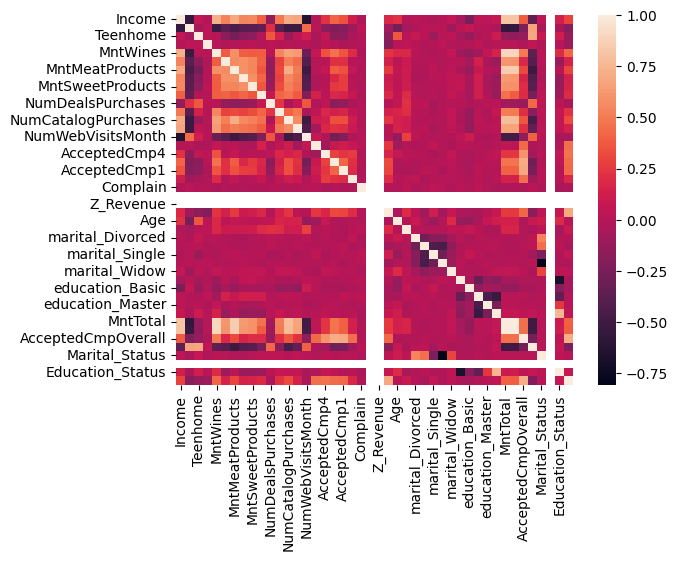

In [ ]:
#Import Seaborn for creating statistical graphics
import seaborn as sns

#To display the heatmap created by Seaborn
import matplotlib.pyplot as plt

#Create a heatmap to visualize the correlation between numeric columns
food = food.apply(pd.to_numeric, errors='coerce')
sns.heatmap(food.corr(method='pearson'))

In [ ]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,NaN,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,NaN,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,NaN,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,NaN,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,NaN,5,0


In [ ]:
food['Age'].sort_values().head()

,Age
43,24
1150,24
2180,25
727,25
1824,25


In [ ]:
#Purpose: specifies the age ranges to categorize individuals into different age groups
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

#Purpose: adds a new column 'Age_Group' to the food DataFrame. This column contains the age group for each individual based on their age
food['Age_Group'] = food['Age'].apply(assign_age_group)

In [ ]:
food[['Age', 'Age_Group']].head()

,Age,Age_Group
0,63,61-70
1,66,61-70
2,55,51-60
3,36,31-40
4,39,31-40


In [ ]:
#Purpose: imports Seaborn for creating statistical graphics
import seaborn as sns

In [ ]:
#mean(): finds the average number of accepted campaigns for each age group
#Reset_index(): Makes sure 'Age_Group' is a regular column, not just an index
#In short, the code calculates the average accepted campaigns by age group and prepares the data for plotting

sns.pointplotdata = food.groupby('Age_Group')['Accepted_Campaigns'].mean().reset_index()
sns.pointplotdata.head()

,Age_Group,Accepted_Campaigns
0,23-30,0.420000
1,31-40,0.315436
2,41-50,0.245098
3,51-60,0.273839
4,61-70,0.281330


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

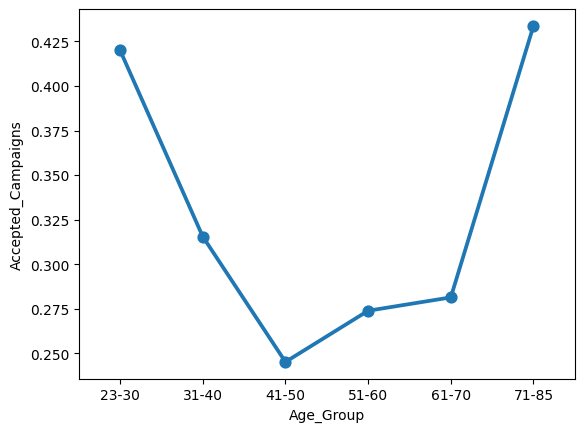

In [ ]:
sns.pointplot(data=sns.pointplotdata, x='Age_Group', y='Accepted_Campaigns')

In [ ]:
counts = food['Age_Group'].value_counts()
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,NaN,3,1,61-70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,NaN,3,0,61-70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,NaN,3,0,51-60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,NaN,3,0,31-40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,NaN,5,0,31-40


<ipython-input-485-b5afee4244f8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='MntTotal', data=grouped_food, palette='Paired')


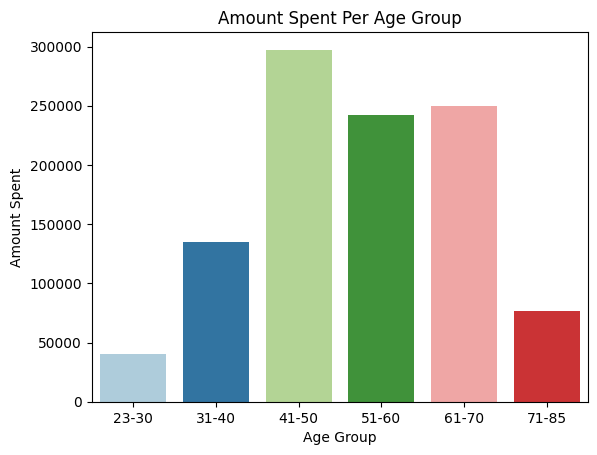

In [ ]:
#Import Seaborn for creating charts
import seaborn as sns

#Import Matplotlib for displaying the charts
import matplotlib.pyplot as plt

#Group the data by 'Age_Group', sum the 'MntTotal' for each group, and reset the index
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

#Create a bar chart with age groups on the x-axis and total amount spent on the y-axis
#Use the 'Paired' color scheme for different bars
sns.barplot(x='Age_Group', y='MntTotal', data=grouped_food, palette='Paired')

#Add a title to the chart
plt.title('Amount Spent Per Age Group')

#Label the x-axis as 'Age Group'
plt.xlabel('Age Group')

#Label the y-axis as 'Amount Spent'
plt.ylabel('Amount Spent')

#Display the chart on the screen
plt.show()

In [ ]:
#Calculates the total sum of purchases from three columns in the food DataFrame and presents these sums in a new DataFrame with a single column named 'Sums'
pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns=['Sums'])

,Sums
NumWebPurchases,7619
NumCatalogPurchases,4871
NumStorePurchases,10675


In [ ]:
#Creates a DataFrame sum_food that contains the total sums of purchases from three specified columns in the food DataFrame
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns=['Sums'])

In [ ]:
#Purpose: resets the index of the sum_food DataFrame, turning the index into a column
sum_food = sum_food.reset_index()

In [ ]:
#Purpose: renames the 'index' column in sum_food
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<ipython-input-490-09c0a302f755>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x = 'Type_of_Purchase', y = 'Sums', data = sum_food, palette = 'Paired')


<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

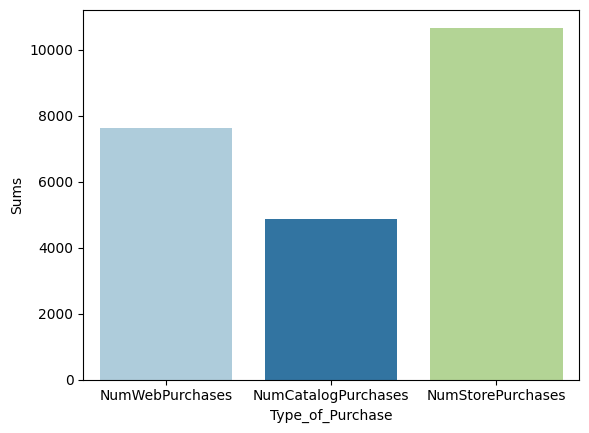

In [ ]:
#Purpose: eates a bar plot showing 'Type_of_Purchase' on the x-axis and 'Sums' on the y-axis using the sum_food DataFrame, with a color palette of 'Paired
sns.barplot (x = 'Type_of_Purchase', y = 'Sums', data = sum_food, palette = 'Paired')

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

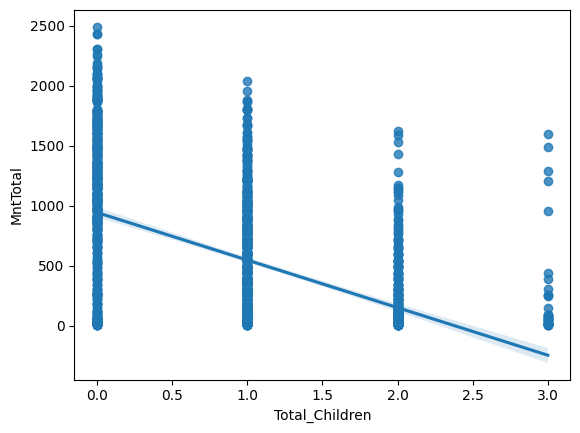

In [ ]:
#Purpose: creates a scatter plot with a regression line showing the relationship between Total_Children and MntTotal in the food DataFrame
sns.regplot(x='Total_Children', y = 'MntTotal', data=food)

In [ ]:
#Purpouse: to count and display the number of missing (NaN) values in the 'Marital_Status_str' column of the food DataFrame
print(food['Marital_Status_str'].isna().sum())

1843


In [ ]:
print(food['Marital_Status_str'].head())
print(food['Marital_Status_str'].value_counts())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Marital_Status_str, dtype: float64
Series([], Name: count, dtype: int64)


In [ ]:
print(food['Marital_Status_str'].dtype)

float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check if the column exists and has data
if 'Marital_Status_str' in food.columns and not food['Marital_Status_str'].dropna().empty:
    #Plot the countplot
    sns.countplot(x='Marital_Status_str', data=food)

    #Add titles and labels
    plt.title('Count of Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')

    #Show the plot
    plt.show()
else:
    print("No data available for 'Marital_Status_str' or column does not exist.")

No data available for 'Marital_Status_str' or column does not exist.


In [ ]:
#Example mapping for creating 'Marital_Status_str' column
food['Marital_Status_str'] = food['Marital_Status'].map({
    5: 'Divorced',
    4: 'Married',
    3: 'Single',
    2: 'Together',
    1: 'Widow'
})

#Verify the creation of the column
print(food['Marital_Status_str'].head())

0      Single
1      Single
2    Together
3    Together
4     Married
Name: Marital_Status_str, dtype: object


Key Findings
*   Education level doesn’t seem to affect spending
*   People with kids generally spend less
*   Married individuals spend significantly more than others

